## Clustering de vectores de traits con PCA

Por medio de la técnica PCA se graficarán los vectores de traits para la base de datos de imágenes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA

Importamos los datos

In [2]:
df = pd.read_excel('../../data/dataset_v3.xlsx')
df = df.drop('Unnamed: 0', axis=1)
df.head()


,catalogation_id,cronology,cronology_time,culture_cl,morfofunctional_category,description,principal_scene,decoration_tecnique_external_body_section1,color_external_body_section1,color_internal_body_section1,...,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105,file_path,image_path
0,ML020107,Horizonte Medio,7,Sican,botella doble cuerpo asa puente cintada silbadora,botella doble cuerpo asa puente cintada silbad...,NaN,pintado escultorico,crema y naranja,NaN,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020107a.jpg
1,ML020108,Horizonte Medio,7,Sican,botella doble pico asa puente cintada escultorica,botella doble pico asa puente cintada escultor...,NaN,pintado escultorico,rojo y naranja,NaN,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020108a.jpg
2,ML020109,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,NaN,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020109a.jpg
3,ML020110,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,NaN,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020110a.jpg
4,ML020111,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y marron,NaN,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020111a.jpg


In [3]:
'''
Reglas de descarte
    - drop if culture_cl=="Chanca"
    -  drop if culture_cl=="Lima"
    -  drop if culture_cl=="Cajamarca" & period_n==5
    -  drop if culture_cl=="Cajamarca" & period_n==7
    -  drop if culture_cl=="Pukara" & period_n==6
    -  drop if culture_cl=="Salinar" & period_n==6
    -  drop if culture_cl=="Sican" & period_n==8
    - drop if culture_cl=="Vicus" & period_n==6
'''
df = df[df.culture_cl != 'Chanca']
df = df[df.culture_cl != 'Lima']
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 5))]
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 7))]
df = df[~((df.culture_cl == 'Pukara') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Salinar') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Sican') & (df.cronology_time == 8))]
df = df[~((df.culture_cl == 'Vicus') & (df.cronology_time == 6))]
len(df)

33562

In [4]:
columns_culture = ['catalogation_id', 'culture_cl', 'cronology_time']
columns_traits = [col for col in df.columns if 'trait' in col]
trait_df = df[columns_culture + columns_traits]
trait_df.head()

,catalogation_id,culture_cl,cronology_time,trait_color_amarillo,trait_color_beige,trait_color_blanco,trait_color_crema,trait_color_gris,trait_color_marron,trait_color_morado,...,trait_n87,trait_n88,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105
0,ML020107,Sican,7,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,1,0
1,ML020108,Sican,7,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,ML020109,Sican,7,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,1,0
3,ML020110,Sican,7,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,1,0
4,ML020111,Sican,7,0,0,0,1,0,1,0,...,0,0,0,0,1,1,1,0,1,0


In [5]:
def get_pca_df(df, trait_df, n_components=2):
    pca = PCA(n_components=n_components)

    # Creamos el dataframe original reducido a 2 componentes
    X_original_pca = pca.fit(df).transform(df)
    df_pca = pd.DataFrame(X_original_pca)

    # Seteamos el dataframe
    df_pca['catalogation_id'] = trait_df['catalogation_id']
    df_pca['culture_cl'] = trait_df['culture_cl']
    df_pca['cronology_time'] = trait_df['cronology_time']
    df_pca = df_pca.rename(columns={0: 'dim1', 1: 'dim2', 2: 'dim3'})
    return df_pca, pca.explained_variance_ratio_

In [6]:
X_pca = df[columns_traits]
df_pca_2d, explained_variance_2d_ = get_pca_df(X_pca, trait_df, 2)
df_pca_3d, explained_variance_3d_ = get_pca_df(X_pca, trait_df, 3)

In [7]:
explained_variance_2d_

array([0.13637795, 0.09527107])

In [25]:
def sample_df(original_df, n_samples):
    cultures = original_df.culture_cl.unique().tolist()
    sampled_dfs = list()

    for c in cultures:
        culture_df = original_df[original_df.culture_cl == c]
        if n_samples > len(culture_df):
            sampled_dfs.append(culture_df)
        else:
            sampled_df = culture_df.sample(n=n_samples, random_state=100)
            sampled_dfs.append(sampled_df)
    
    df = pd.concat(sampled_dfs, axis=0)
    return df



def plot_by_cronology_time(df, title, n_samples=None):

    df_notnull = df[~df.cronology_time.isnull()]
    df_notnull = df[df.cronology_time != 9]

    if n_samples is not None:
        df_notnull = sample_df(df_notnull, n_samples)

    grid = sns.FacetGrid(df_notnull, col='cronology_time', col_wrap=3, height=5)
    g = grid.map_dataframe(sns.scatterplot, "dim1", "dim2", hue='culture_cl')
    g.add_legend()

    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(title)


def plot_2d(pca_df, model_name):

    sns.set(rc={"figure.figsize":(12, 10)})

    ax = sns.scatterplot(pca_df, x='dim1', y='dim2', hue='culture_cl')

    # configurar el gráfico    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(f'Dos dimensiones PCA de vector de traits de imágenes según cultura | {model_name}')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.show()



def plot_3d(pca_df, model_name, n_samples=None):

    if n_samples is not None:
        pca_df = sample_df(pca_df, n_samples)
    
    sns.set(rc={"figure.figsize":(12, 10)})

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')


    color_mapping = {
        'Sican': 'red',
        'Recuay': 'blue',
        'Vicus': 'green',
        'Lima': 'yellow',
        'Gallinazo': 'magenta',
        'Moche': 'brown',
        'Salinar': 'black',
        'Paracas': 'white',
        'Wari': 'lightblue',
        'Cajamarca': 'lightgreen',
        'Cupisnique': 'lightyellow',
        'Pukara': 'gray',
        'Nasca': 'pink',
        'Chimu': 'purple',
        'Chanca': 'cyan',
        'Chancay': 'orange',
        'Inca': 'olive',
        'Tiahuanaco': 'gold',
        'Chincha': 'darkred'
    }

    patches = list() # For custom legend
    for culture, color in color_mapping.items():
        culture_df = pca_df[pca_df.culture_cl == culture]
        x = culture_df['dim1']
        y = culture_df['dim2']
        z = culture_df['dim3']

        ax.scatter(x, y, z, c=color, marker='o')

        # Set legends
        patch = mpatches.Patch(color=color, label=culture)
        patches.append(patch)


    ax.set_xlabel("Dimensión 1")
    ax.set_ylabel("Dimensión 2")
    ax.set_zlabel("Dimensión 3")
    ax.legend(handles=patches)
    
    plt.title(f'Tres dimensiones PCA de vector de traits de imágenes según cultura | {model_name}')
    plt.show()

In [19]:
dim1_explained = np.round(explained_variance_2d_[0], 5)
dim2_explained = np.round(explained_variance_2d_[1], 5)
explained_variance_title = f'Dim 1: {dim1_explained}, Dim 2: {dim2_explained}'

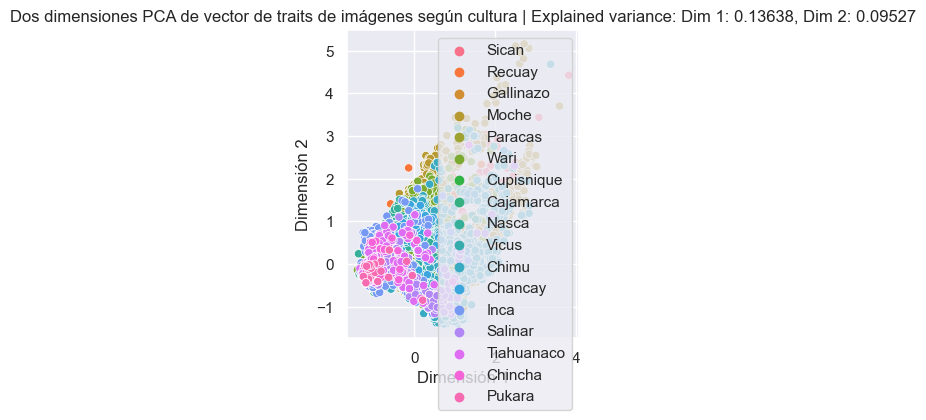

In [20]:
plot_2d(df_pca_2d, f'Explained variance: {explained_variance_title}')

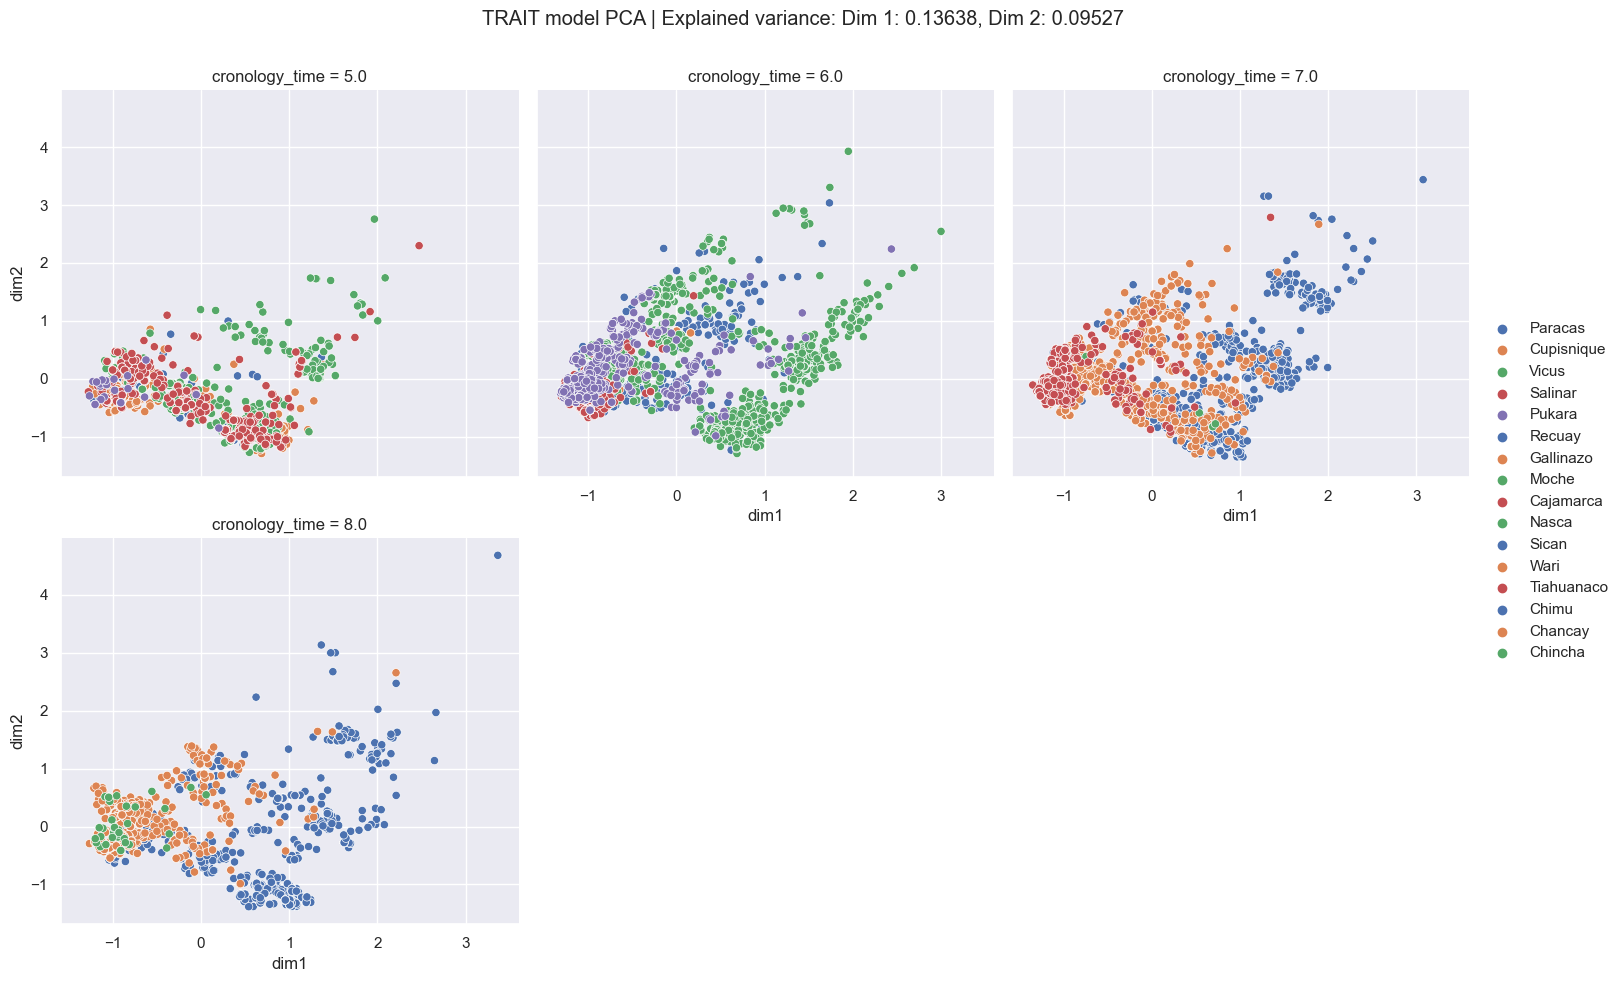

In [22]:
dim1_explained = np.round(explained_variance_2d_[0], 5)
dim2_explained = np.round(explained_variance_2d_[1], 5)
explained_variance_title = f'Dim 1: {dim1_explained}, Dim 2: {dim2_explained}'
plot_by_cronology_time(df_pca_2d, f'TRAIT model PCA | Explained variance: {explained_variance_title}', n_samples=1000)

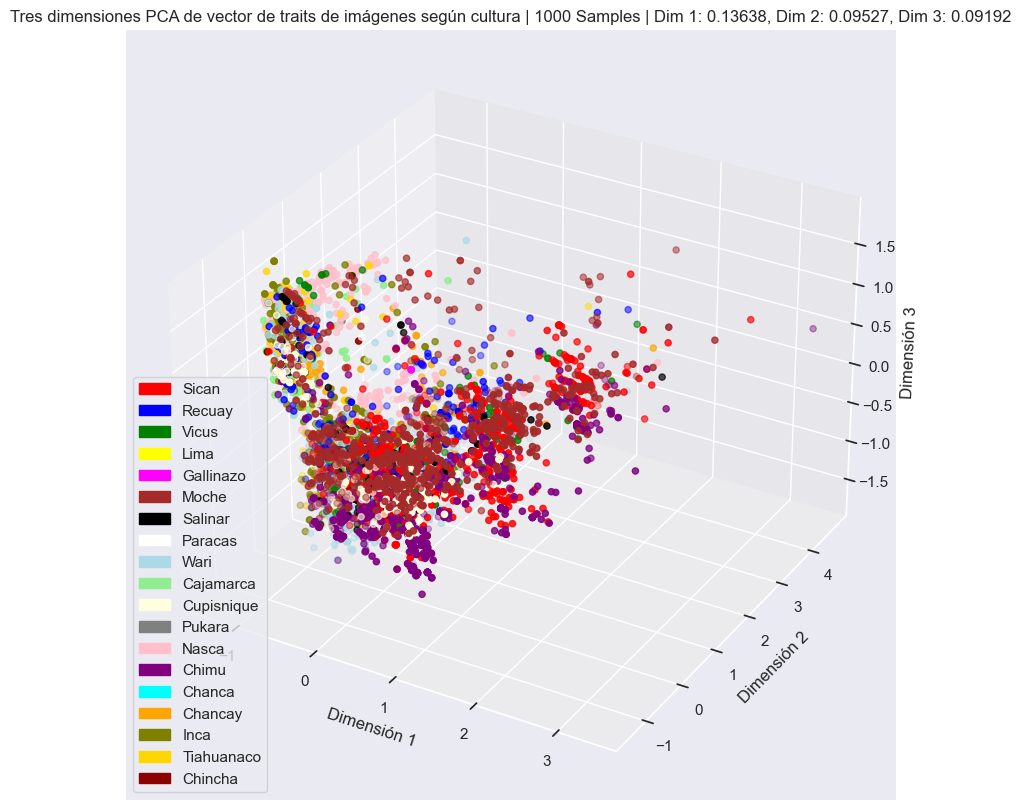

In [27]:
dim1_explained_3d = np.round(explained_variance_3d_[0], 5)
dim2_explained_3d = np.round(explained_variance_3d_[1], 5)
dim3_explained_3d = np.round(explained_variance_3d_[2], 5)
explained_variance_title_3d = f'Dim 1: {dim1_explained_3d}, Dim 2: {dim2_explained_3d}, Dim 3: {dim3_explained_3d}'
plot_3d(df_pca_3d, f'1000 Samples | {explained_variance_title_3d}', n_samples=1000)

### Gráfico por cronología

In [24]:
def plot_by_cronology_time(df, plot_fn):
    cronology_times = df.cronology_time.unique().tolist()

    df_notnull = df[~df.cronology_time.isnull()]
    for ctime in cronology_times:
        df_filtered = df_notnull[df_notnull.cronology_time == ctime]
        plot_fn(df_filtered, f'cronology_time={ctime}')

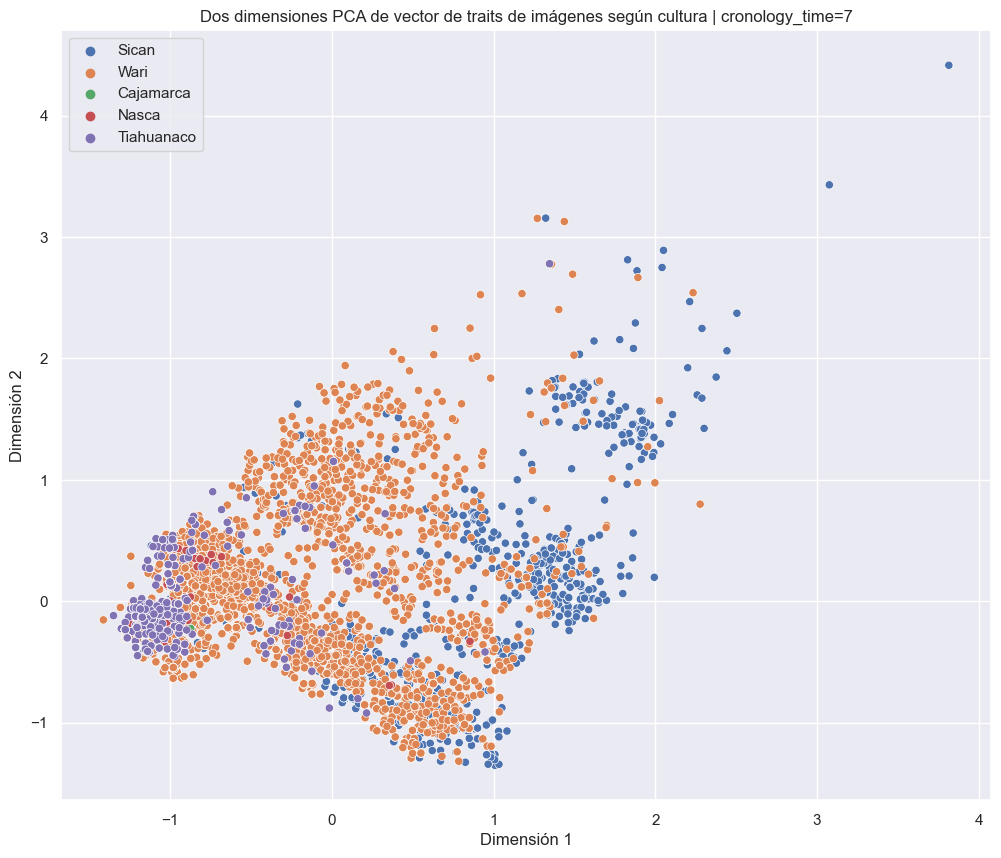

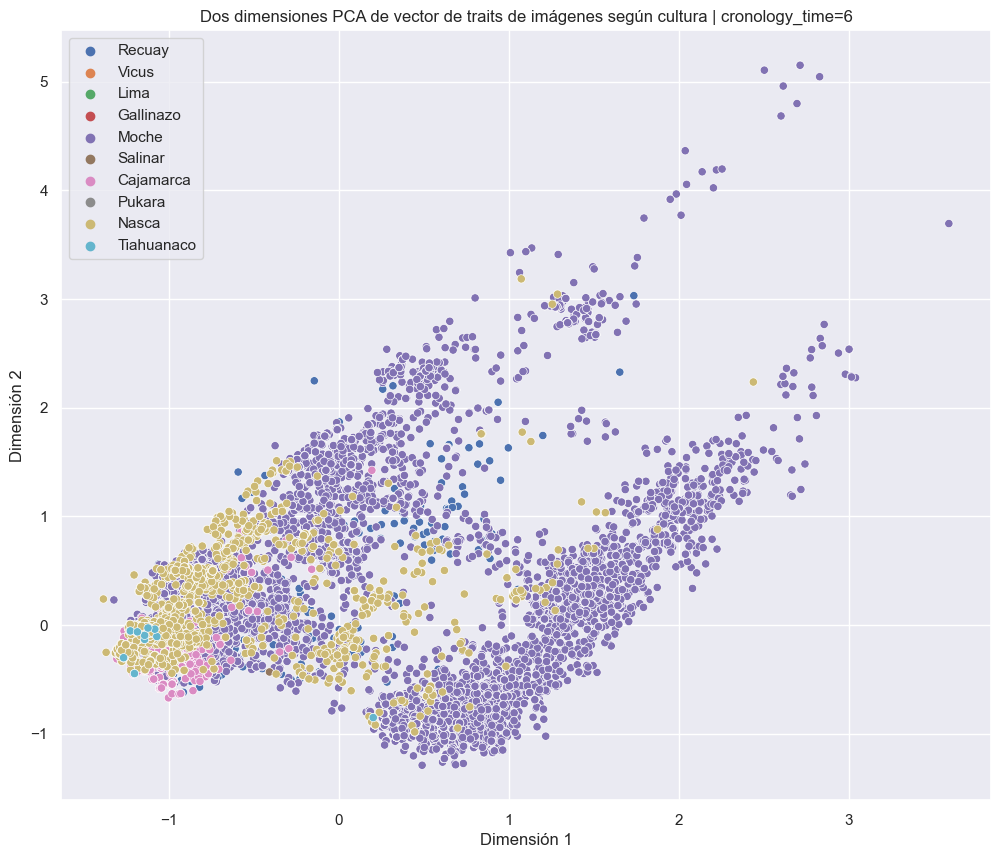

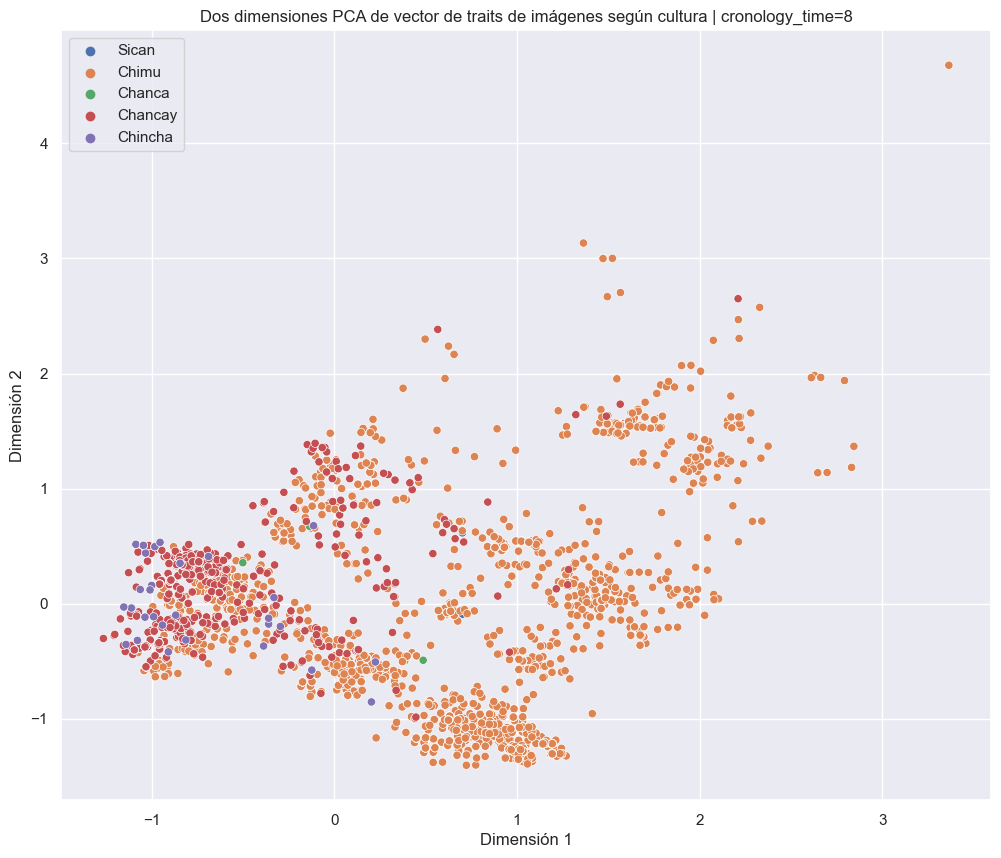

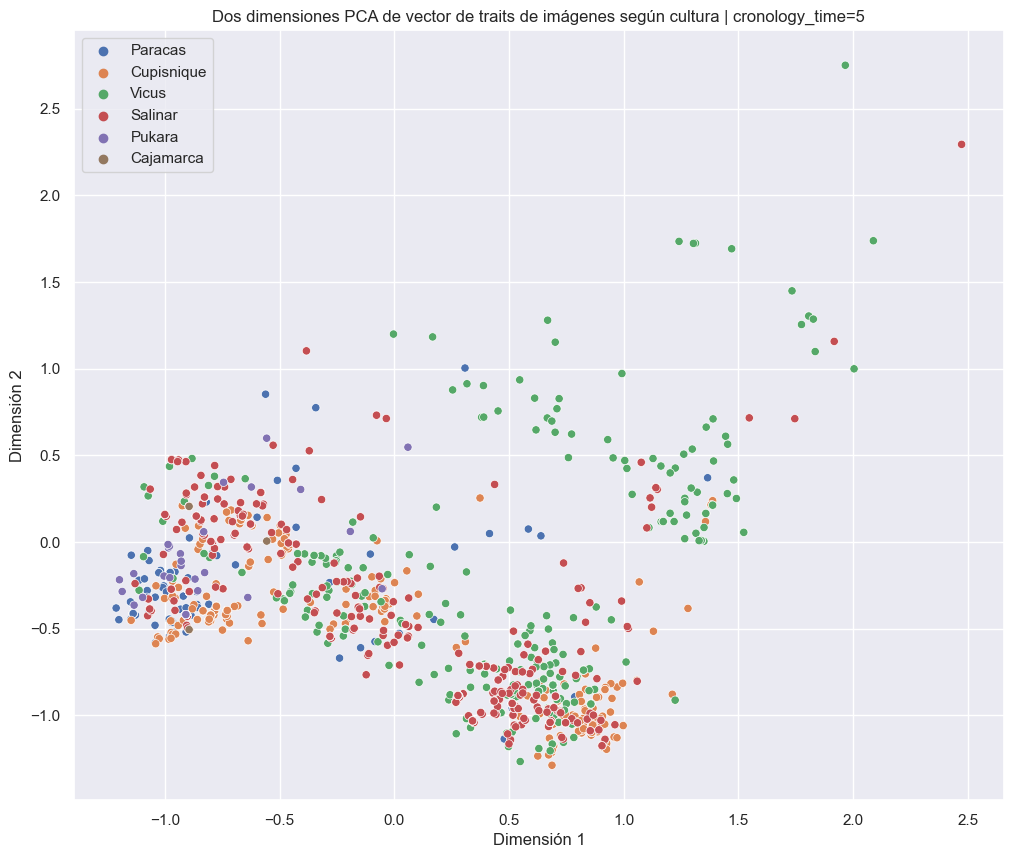

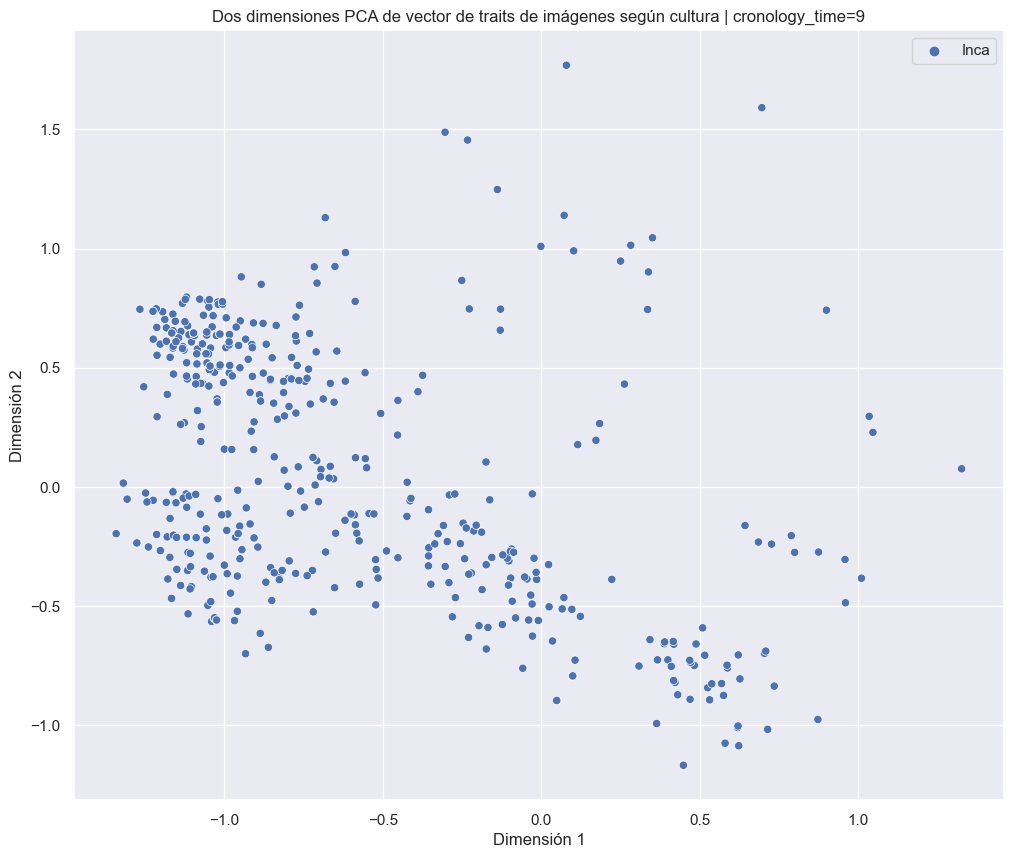

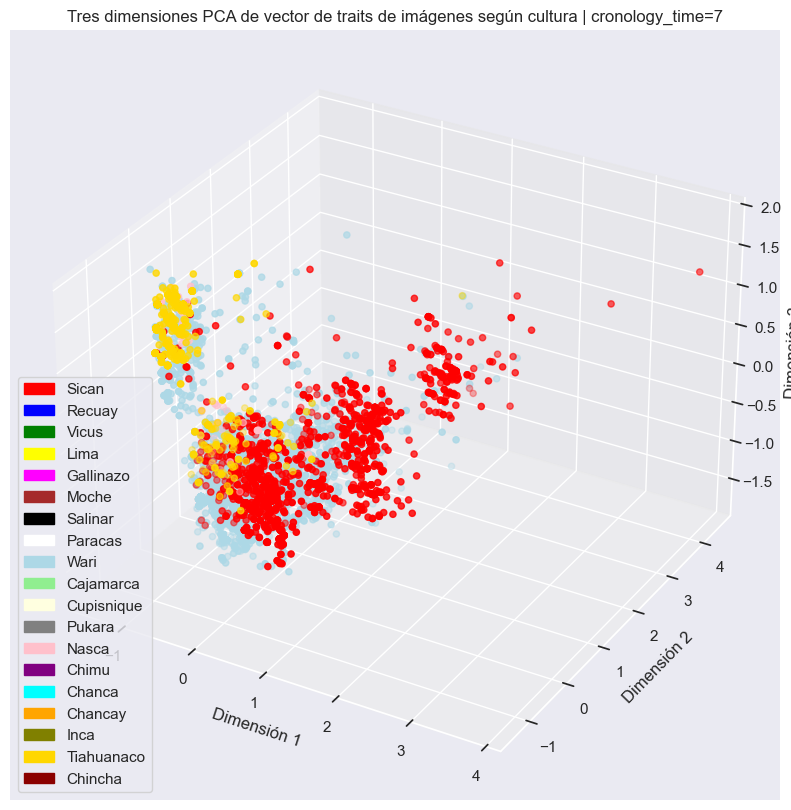

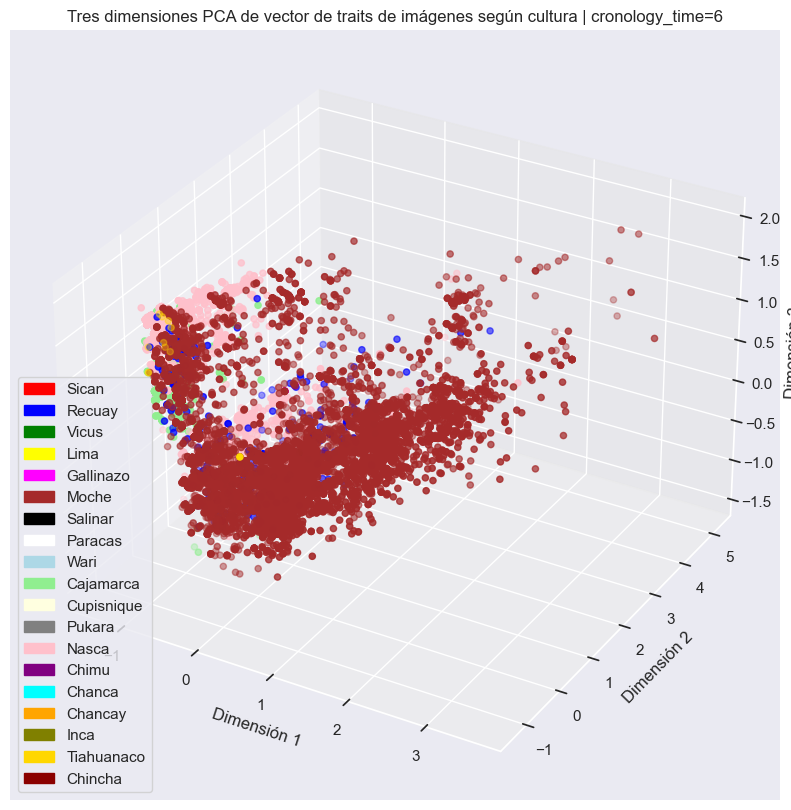

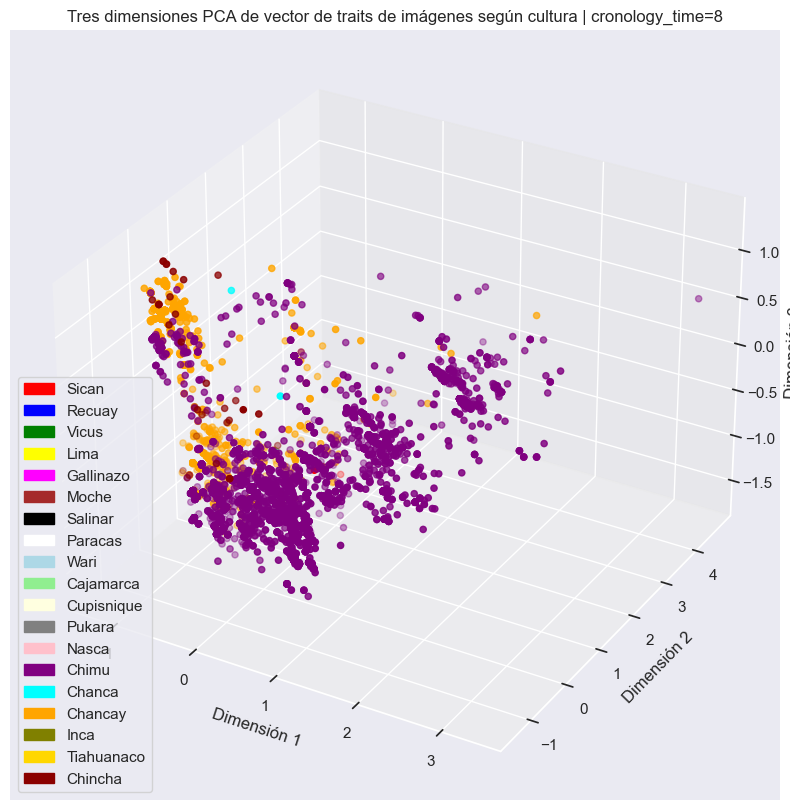

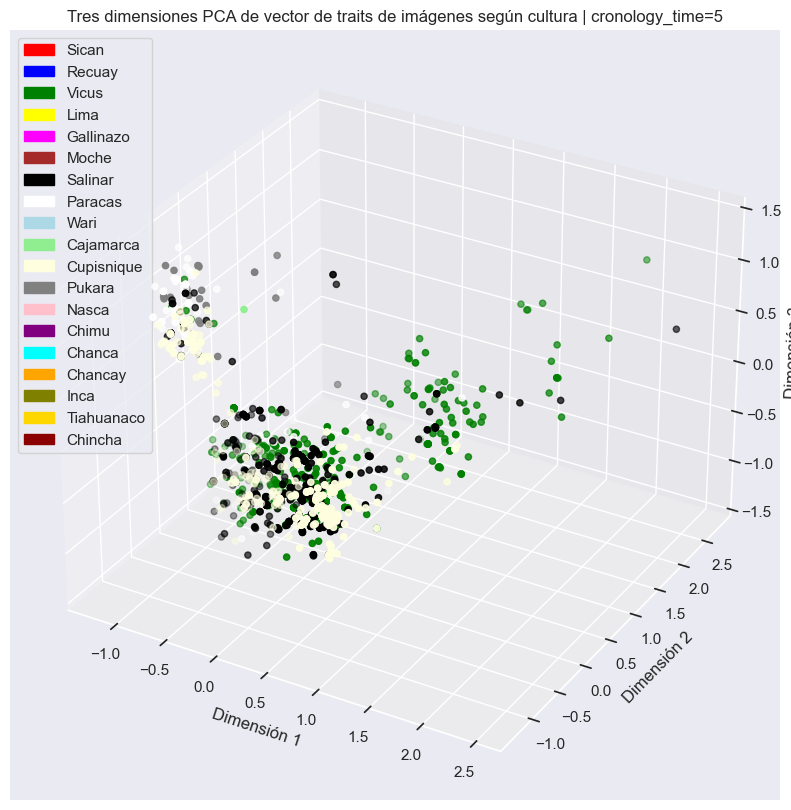

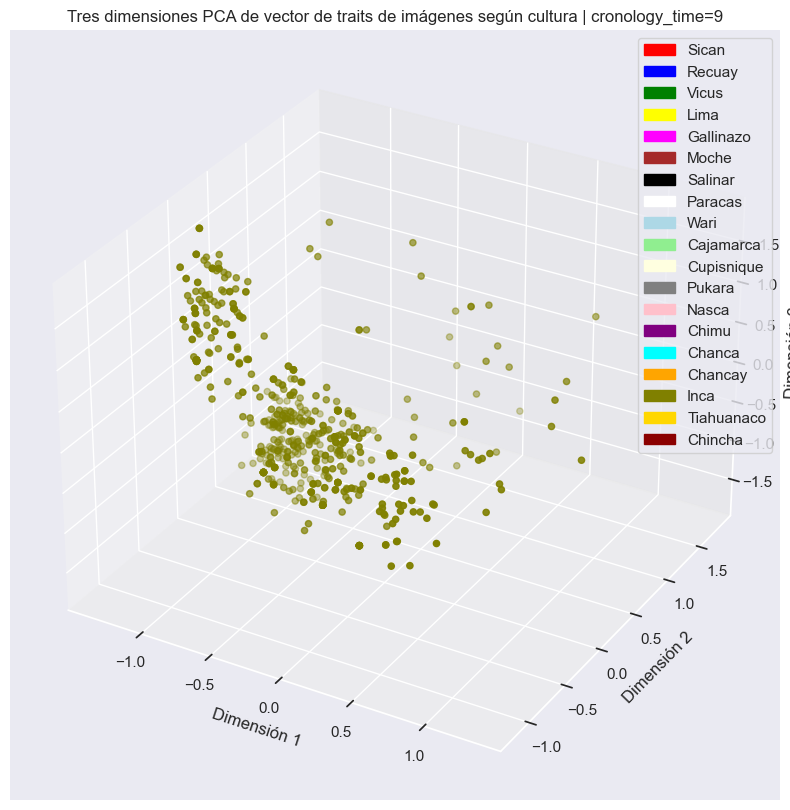

In [25]:
plot_by_cronology_time(df_pca_2d, plot_2d)
plot_by_cronology_time(df_pca_3d, plot_3d)